<a href="https://colab.research.google.com/github/2303A52183/explainable-AI-Lab-Assignment-github/blob/main/exai_research_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original dataset: (196241, 12)
Sampled dataset: (5000, 12)
✅ Test MSE: 0.0000, R²: 0.9996


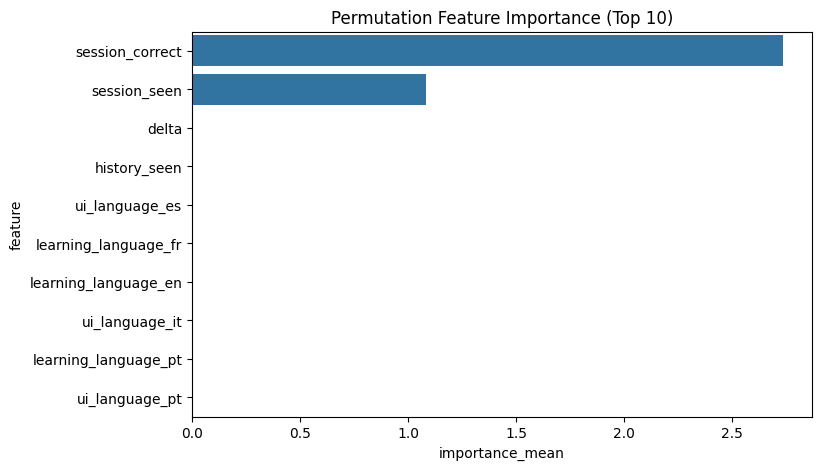

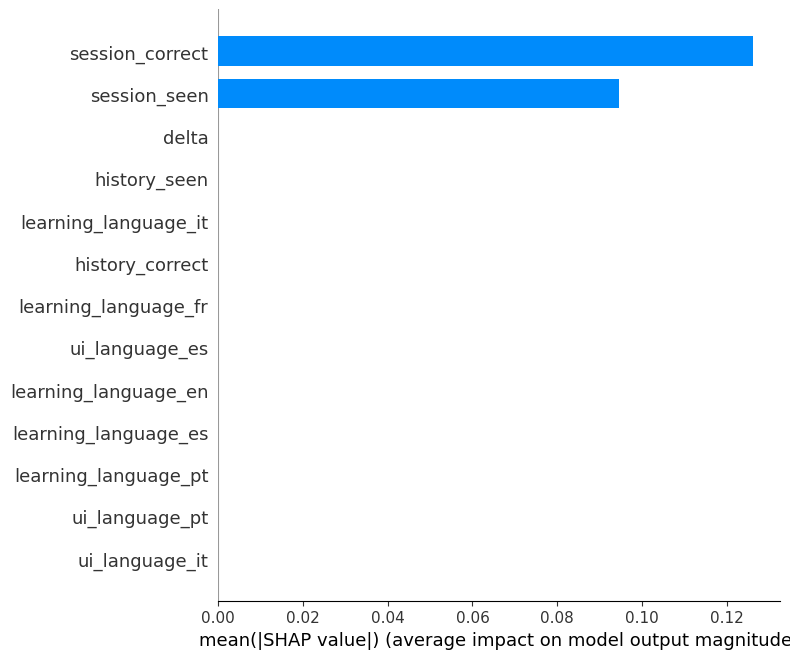

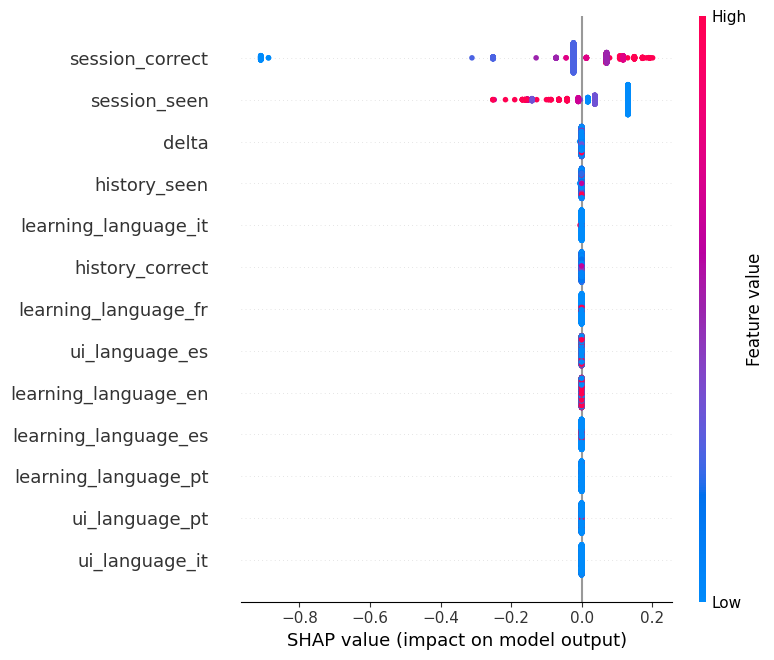

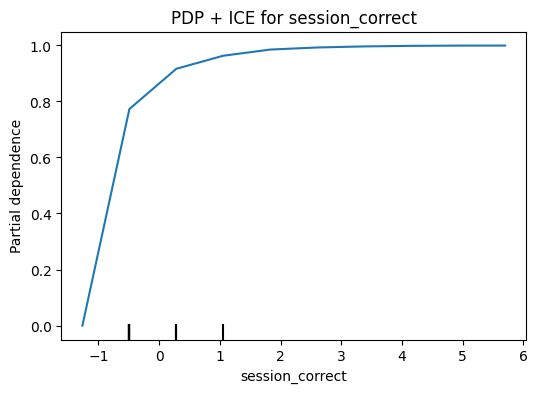

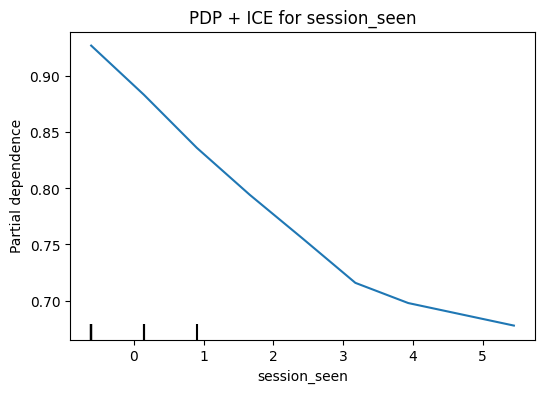

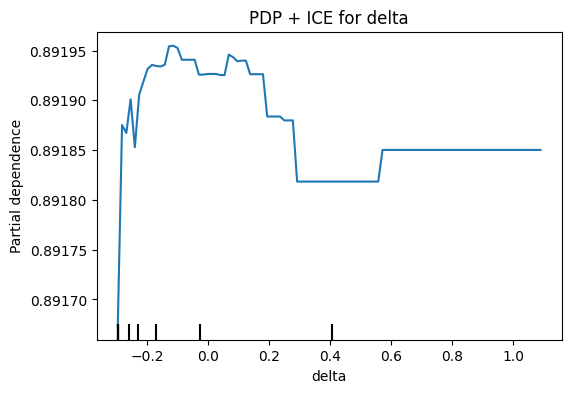

In [4]:
# =============================
# DUOLINGO DATASET FULL XAI PIPELINE (5000 SAMPLE VERSION)
# =============================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import shap
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# =============================
# 1️⃣ Load Dataset (Take Only 5000 Samples)
# =============================
df = pd.read_csv("/content/learning_traces.13m.csv")  # <-- update path if needed
print("Original dataset:", df.shape)

# Take a random sample of 5000 rows for speed & memory efficiency
df = df.sample(n=5000, random_state=42).reset_index(drop=True)
print("Sampled dataset:", df.shape)

# =============================
# 2️⃣ Feature Selection & Target
# =============================
target = "p_recall"
features = [
    "delta", "history_seen", "history_correct",
    "session_seen", "session_correct",
    "learning_language", "ui_language"
]

X = df[features].copy()
y = df[target].copy()

# =============================
# 3️⃣ Handle Missing Values
# =============================
X = X.fillna(X.median(numeric_only=True))
X = X.fillna("Unknown")

# =============================
# 4️⃣ Encode Categorical Columns
# =============================
cat_cols = ["learning_language", "ui_language"]
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# =============================
# 5️⃣ Scale Numeric Features
# =============================
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# =============================
# 6️⃣ Train-Test Split (80/20)
# =============================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# =============================
# 7️⃣ Random Forest Model
# =============================
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"✅ Test MSE: {mse:.4f}, R²: {r2:.4f}")

# =============================
# 8️⃣ Permutation Importance
# =============================
perm_res = permutation_importance(rf, X_test, y_test, n_repeats=5, random_state=42)

imp_df = pd.DataFrame({
    "feature": X.columns,  # FIXED: now matches encoded/scaled columns
    "importance_mean": perm_res.importances_mean,
    "importance_std": perm_res.importances_std
}).sort_values("importance_mean", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=imp_df.head(10), x="importance_mean", y="feature")
plt.title("Permutation Feature Importance (Top 10)")
plt.show()

# =============================
# 9️⃣ SHAP Explainability
# =============================
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

# =============================
# 🔟 LIME Explainability
# =============================
lime_explainer = LimeTabularExplainer(
    X_train.values,
    feature_names=X.columns.tolist(),
    mode="regression"
)

i = np.random.randint(0, len(X_test))
exp = lime_explainer.explain_instance(X_test.iloc[i].values, rf.predict, num_features=10)
exp.show_in_notebook(show_table=True)

# =============================
# 11️⃣ PDP & ICE Plots
# =============================
top_feats = imp_df["feature"].head(3).tolist()

for feat in top_feats:
    fig, ax = plt.subplots(figsize=(6, 4))
    PartialDependenceDisplay.from_estimator(rf, X_test, [feat], ax=ax)
    plt.title(f"PDP + ICE for {feat}")
    plt.show()


Original dataset shape: (1383135, 12)
Sampled dataset shape: (5000, 12)
Class balance:
 target
1    0.9228
0    0.0772
Name: proportion, dtype: float64

Training LogisticRegression ...
LogisticRegression -> Acc:1.0000, F1:1.0000, ROC:1.0000

Training DecisionTree ...
DecisionTree -> Acc:1.0000, F1:1.0000, ROC:1.0000

Training RandomForest ...
RandomForest -> Acc:0.9990, F1:0.9995, ROC:1.0000

Training SVM ...
SVM -> Acc:0.9950, F1:0.9973, ROC:0.9996

Training KNN ...
KNN -> Acc:0.9600, F1:0.9788, ROC:0.9693

Training XGBoost ...
XGBoost -> Acc:1.0000, F1:1.0000, ROC:1.0000

Training AdaBoost ...
AdaBoost -> Acc:1.0000, F1:1.0000, ROC:1.0000

Training LightGBM ...
LightGBM -> Acc:1.0000, F1:1.0000, ROC:1.0000

Training CatBoost ...
CatBoost -> Acc:1.0000, F1:1.0000, ROC:1.0000


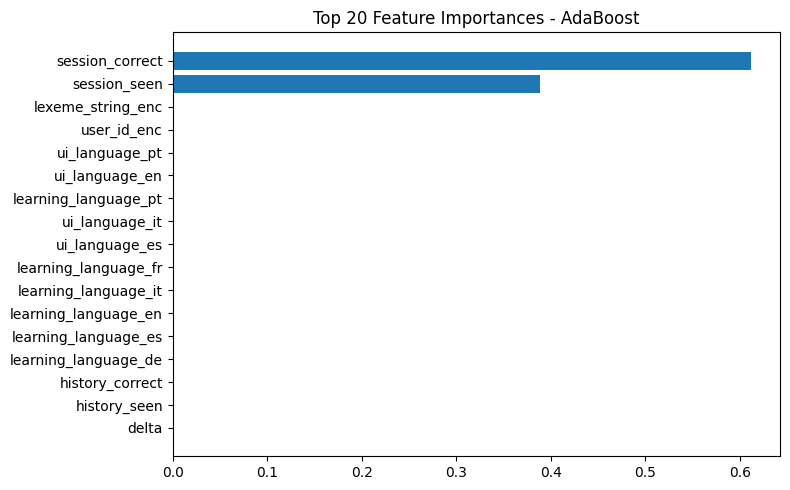

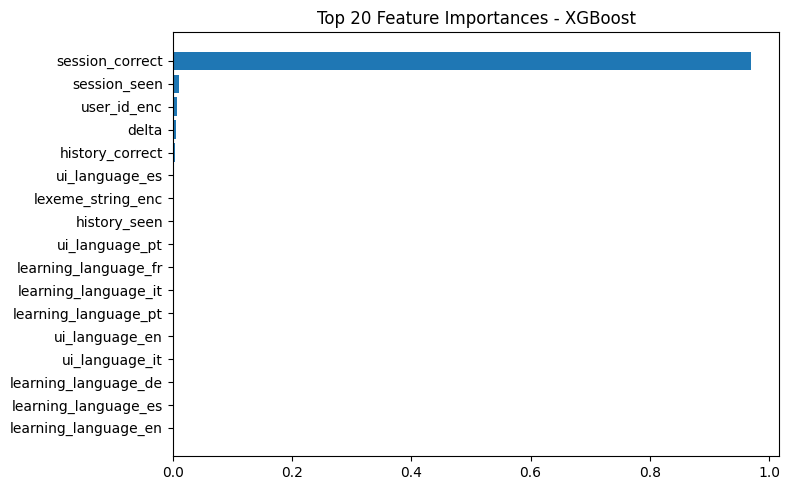

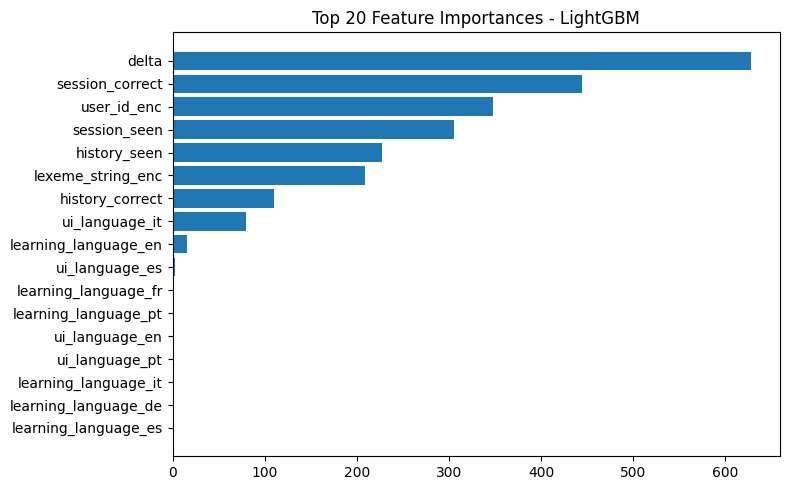

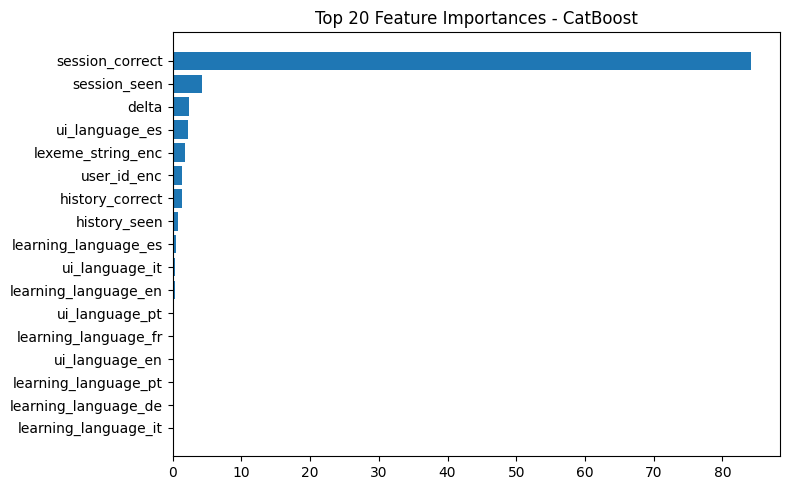

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Computing SHAP values for LightGBM...


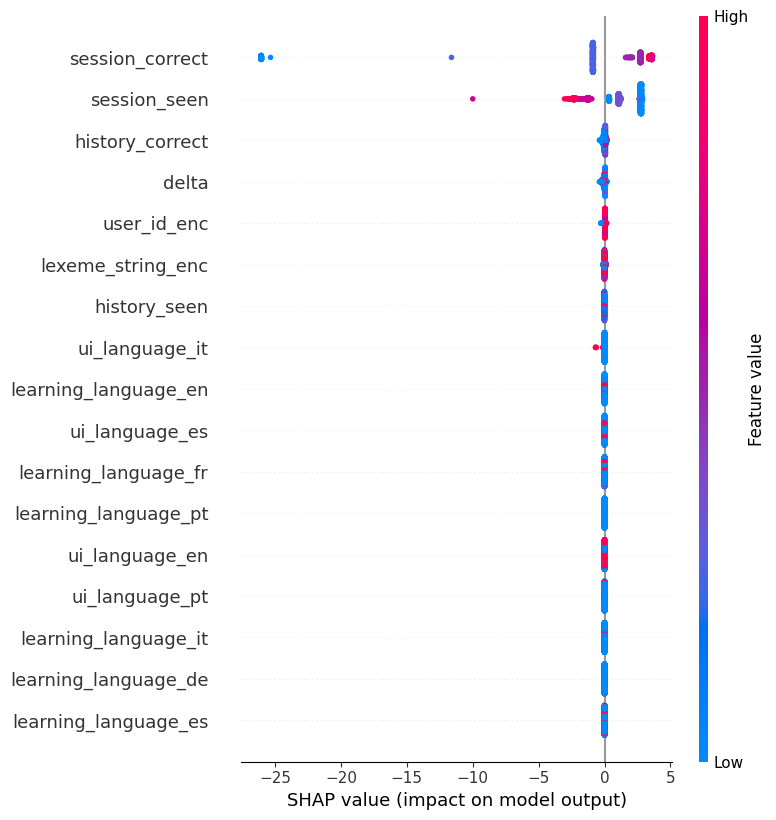


Computing SHAP values for CatBoost...


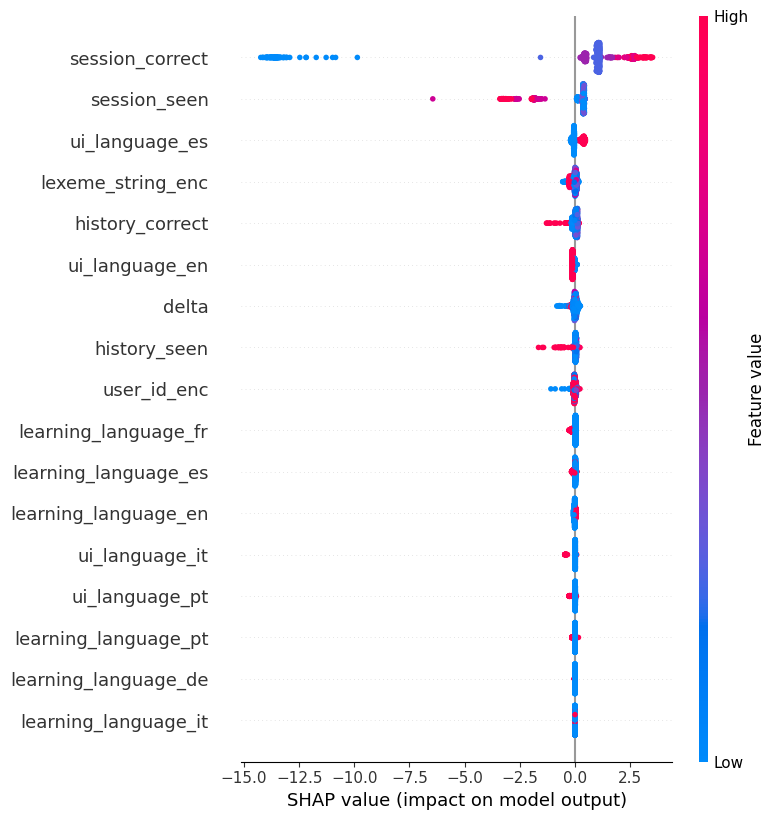

LightGBM LIME top features:
 [('session_correct <= -0.47', -0.284881758220824), ('session_seen <= -0.60', 0.25627983841123614), ('user_id_enc > 0.85', 0.025726430159454316), ('learning_language_es > 0.00', -0.018308633937715278), ('ui_language_pt <= 0.00', 0.015606387687407724), ('learning_language_pt <= 0.00', 0.012572222727674588), ('learning_language_de <= 0.00', -0.01219880109647249), ('learning_language_en <= 0.00', 0.010677622157262097), ('ui_language_it <= 0.00', 0.00933757676190276), ('-0.20 < history_correct <= -0.08', -0.00888211648608965)]


In [ ]:
# -----------------------------
# Full XAI pipeline (with XGBoost, LightGBM, CatBoost, AdaBoost)
# -----------------------------
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# XGBoost / LightGBM / CatBoost
import xgboost as xgb
from lightgbm import LGBMClassifier
!pip install catboost -q
from catboost import CatBoostClassifier

# SHAP & LIME
import shap
!pip install lime -q
from lime.lime_tabular import LimeTabularExplainer

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras import layers, callbacks
from tensorflow.keras.models import Model

# -----------------------------
# 0. Load & sample dataset
# -----------------------------
DATA_PATH = "/content/learning_traces.13m.csv"
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Save your dataset as {DATA_PATH} before running.")

df = pd.read_csv(DATA_PATH, sep=None, engine='python')
print("Original dataset shape:", df.shape)

# Sample for speed
df = df.sample(n=5000, random_state=42).reset_index(drop=True)
print("Sampled dataset shape:", df.shape)

# -----------------------------
# 1. Target creation (binary)
# -----------------------------
THRESHOLD = 0.5
df = df.dropna(subset=['p_recall'])
df['target'] = (df['p_recall'].astype(float) >= THRESHOLD).astype(int)
print("Class balance:\n", df['target'].value_counts(normalize=True))

# -----------------------------
# 2. Preprocessing
# -----------------------------
numerical_features = ['delta', 'history_seen', 'history_correct', 'session_seen', 'session_correct']
categorical_features = ['user_id', 'learning_language', 'ui_language', 'lexeme_string']

X = df[numerical_features + categorical_features].copy()
y = df['target'].copy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')

low_cardinality_cols = [c for c in categorical_features if X_train[c].nunique() <= 20]
high_cardinality_cols = [c for c in categorical_features if X_train[c].nunique() > 20]

# Label encode high-cardinality
for col in high_cardinality_cols:
    vals, uniques = pd.factorize(X_train[col].astype(str))
    mapping = dict(zip(uniques, range(len(uniques))))
    X_train[col] = X_train[col].astype(str).map(mapping).fillna(len(uniques)).astype(int)
    X_test[col] = X_test[col].astype(str).map(mapping).fillna(len(uniques)).astype(int)

numeric_pipeline = Pipeline([
    ('imputer', num_imputer), ('scaler', StandardScaler())
])
categorical_low_pipeline = Pipeline([
    ('imputer', cat_imputer), ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
high_card_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)), ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numerical_features),
    ('lowcat', categorical_low_pipeline, low_cardinality_cols),
    ('highcard', high_card_pipeline, high_cardinality_cols)
], remainder='drop')

preprocessor.fit(X_train)
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)

def get_feature_names(preprocessor):
    features = numerical_features[:]
    if low_cardinality_cols:
        ohe = preprocessor.named_transformers_['lowcat'].named_steps['ohe']
        try:
            ohe_names = list(ohe.get_feature_names_out(low_cardinality_cols))
        except:
            ohe_names = list(ohe.get_feature_names(low_cardinality_cols))
        features += ohe_names
    features += [f"{c}_enc" for c in high_cardinality_cols]
    return features

feature_names = get_feature_names(preprocessor)

# -----------------------------
# 3. Classical & Boosting Models
# -----------------------------
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42),
    'SVM': SVC(probability=True, kernel='rbf', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=200, random_state=42),
    'LightGBM': LGBMClassifier(n_estimators=200, random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(iterations=200, depth=6, learning_rate=0.1, verbose=0, random_seed=42)
}

results = {}
for name, model in models.items():
    print(f"\nTraining {name} ...")
    model.fit(X_train_proc, y_train)
    y_pred = model.predict(X_test_proc)
    y_proba = model.predict_proba(X_test_proc)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    results[name] = dict(model=model, acc=acc, prec=prec, rec=rec, f1=f1, roc=roc)
    print(f"{name} -> Acc:{acc:.4f}, F1:{f1:.4f}, ROC:{roc:.4f}")

# -----------------------------
# 3.1 Feature Importance Plots
# -----------------------------
def plot_feature_importance(model, model_name, feature_names, top_n=20):
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        if len(importances) != len(feature_names):
            print(f"Skipping {model_name} due to shape mismatch.")
            return
        sorted_idx = np.argsort(importances)[-top_n:]
        plt.figure(figsize=(8,5))
        plt.barh(np.array(feature_names)[sorted_idx], importances[sorted_idx])
        plt.title(f"Top {top_n} Feature Importances - {model_name}")
        plt.tight_layout()
        plt.show()

for model_name in ['AdaBoost', 'XGBoost', 'LightGBM', 'CatBoost']:
    model = results[model_name]['model']
    plot_feature_importance(model, model_name, feature_names)

# -----------------------------
# 4. Deep Learning Model
# -----------------------------
X_train_dl = X_train_proc.astype(np.float32)
X_test_dl = X_test_proc.astype(np.float32)
y_train_dl = y_train.values.astype(np.float32)
y_test_dl = y_test.values.astype(np.float32)

tf.random.set_seed(42)

def build_mlp(input_shape):
    inp = layers.Input(shape=(input_shape,))
    x = layers.Dense(64, activation='relu')(inp)
    x = layers.Dense(32, activation='relu')(x)
    out = layers.Dense(1, activation='sigmoid')(x)
    model = Model(inp, out)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

mlp = build_mlp(X_train_dl.shape[1])
es = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
mlp.fit(X_train_dl, y_train_dl, validation_split=0.1, epochs=50, batch_size=32, callbacks=[es], verbose=0)
y_proba_mlp = mlp.predict(X_test_dl).ravel()

# -----------------------------
# 5. SHAP Explainability
# -----------------------------
print("\nComputing SHAP values for LightGBM...")
model_lgbm = results['LightGBM']['model']
explainer_lgbm = shap.TreeExplainer(model_lgbm)
shap_values_lgbm = explainer_lgbm.shap_values(X_test_proc)
if isinstance(shap_values_lgbm, list):
    shap_values_lgbm = shap_values_lgbm[1]
shap.summary_plot(shap_values_lgbm, pd.DataFrame(X_test_proc, columns=feature_names))

print("\nComputing SHAP values for CatBoost...")
model_cat = results['CatBoost']['model']
explainer_cat = shap.TreeExplainer(model_cat)
shap_values_cat = explainer_cat.shap_values(X_test_proc)
if isinstance(shap_values_cat, list):
    shap_values_cat = shap_values_cat[1]
shap.summary_plot(shap_values_cat, pd.DataFrame(X_test_proc, columns=feature_names))

# -----------------------------
# 6. LIME Example
# -----------------------------
lime_exp = LimeTabularExplainer(
    training_data=X_train_proc,
    feature_names=feature_names,
    class_names=['0', '1'],
    mode='classification'
)
exp = lime_exp.explain_instance(X_test_proc[0], model_lgbm.predict_proba, num_features=10)
print("LightGBM LIME top features:\n", exp.as_list())



Training LogisticRegression ...
LogisticRegression -> Acc:0.9970, Prec:0.9968, Rec:1.0000, F1:0.9984, ROC-AUC:1.0000


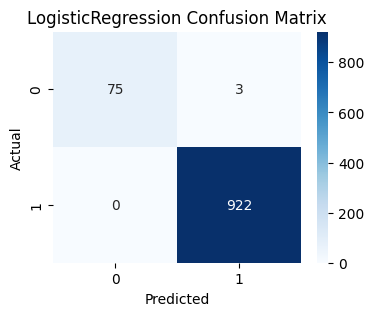


Training DecisionTree ...
DecisionTree -> Acc:1.0000, Prec:1.0000, Rec:1.0000, F1:1.0000, ROC-AUC:1.0000


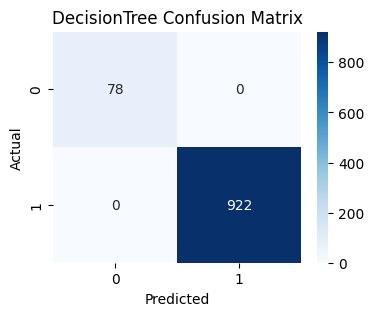


Training RandomForest ...
RandomForest -> Acc:0.9970, Prec:0.9968, Rec:1.0000, F1:0.9984, ROC-AUC:0.9997


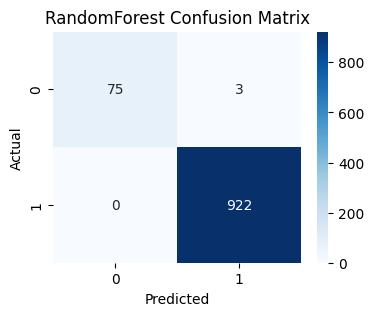


Training SVM ...
SVM -> Acc:0.9940, Prec:0.9935, Rec:1.0000, F1:0.9968, ROC-AUC:0.9997


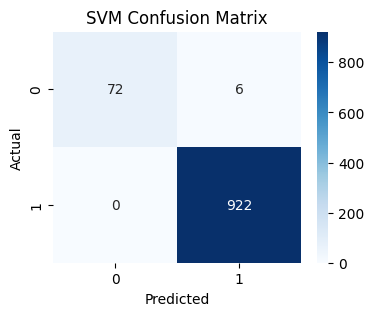


Training KNN ...
KNN -> Acc:0.9540, Prec:0.9534, Rec:0.9989, F1:0.9756, ROC-AUC:0.9609


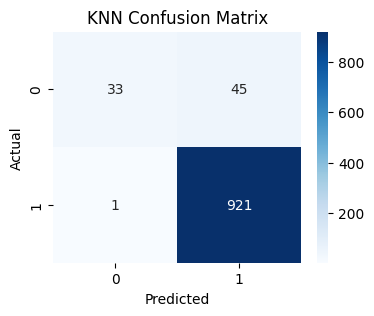


Training XGBoost ...
XGBoost -> Acc:0.9970, Prec:0.9968, Rec:1.0000, F1:0.9984, ROC-AUC:1.0000


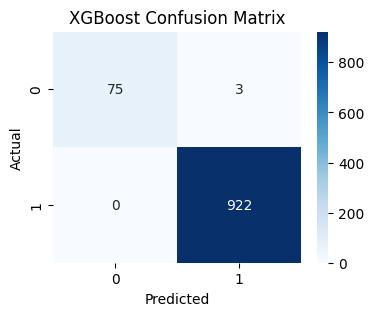

,acc,prec,rec,f1,roc
LogisticRegression,0.997,0.996757,1.000000,0.998376,1.000000
DecisionTree,1.000,1.000000,1.000000,1.000000,1.000000
RandomForest,0.997,0.996757,1.000000,0.998376,0.999694
SVM,0.994,0.993534,1.000000,0.996757,0.999750
KNN,0.954,0.953416,0.998915,0.975636,0.960934
XGBoost,0.997,0.996757,1.000000,0.998376,1.000000


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MLP -> Acc:0.9980, Prec:0.9978, Rec:1.0000, F1:0.9989, ROC-AUC:1.0000


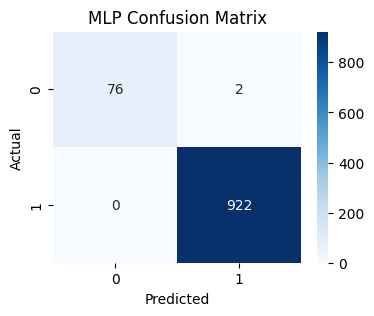

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1D-CNN -> Acc:0.9990, Prec:0.9989, Rec:1.0000, F1:0.9995, ROC-AUC:1.0000


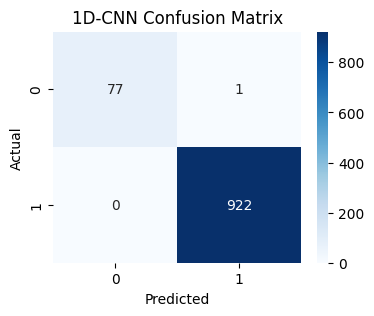

,acc,prec,rec,f1,roc
MLP,0.998,0.997835,1.0,0.998917,1.0
1D-CNN,0.999,0.998917,1.0,0.999458,1.0


In [ ]:
# -----------------------------
# 3. Classical ML models with graphs
# -----------------------------
import matplotlib.pyplot as plt
import seaborn as sns

results = {}
for name, model in models.items():
    print(f"\nTraining {name} ...")
    model.fit(X_train_proc, y_train)
    y_pred = model.predict(X_test_proc)
    y_proba = model.predict_proba(X_test_proc)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_test_proc)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    try:
        roc = roc_auc_score(y_test, y_proba)
    except:
        roc = np.nan

    results[name] = dict(model=model, acc=acc, prec=prec, rec=rec, f1=f1, roc=roc)
    print(f"{name} -> Acc:{acc:.4f}, Prec:{prec:.4f}, Rec:{rec:.4f}, F1:{f1:.4f}, ROC-AUC:{roc:.4f}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Display summary
import pandas as pd
res_df = pd.DataFrame({k: {m: v for m, v in values.items() if m!='model'} for k, values in results.items()}).T
display(res_df)

# -----------------------------
# 4. Deep Learning Models with graphs
# -----------------------------
def eval_and_plot(model_name, y_true, y_pred_proba, threshold=0.5):
    y_pred = (y_pred_proba >= threshold).astype(int)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    try:
        roc = roc_auc_score(y_true, y_pred_proba)
    except:
        roc = np.nan
    print(f"{model_name} -> Acc:{acc:.4f}, Prec:{prec:.4f}, Rec:{rec:.4f}, F1:{f1:.4f}, ROC-AUC:{roc:.4f}")
    # confusion matrix plot
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    return dict(acc=acc, prec=prec, rec=rec, f1=f1, roc=roc)

# MLP
mlp = build_mlp(X_train_dl.shape[1])
es = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
mlp.fit(X_train_dl, y_train_dl, validation_split=0.1, epochs=50, batch_size=32, callbacks=[es], verbose=0)
y_proba_mlp = mlp.predict(X_test_dl).ravel()
res_mlp = eval_and_plot("MLP", y_test_dl, y_proba_mlp)

# 1D-CNN
def build_cnn1d(input_shape):
    inp = layers.Input(shape=(input_shape,1))
    x = layers.Conv1D(32, 3, activation='relu', padding='same')(inp)
    x = layers.Conv1D(64, 3, activation='relu', padding='same')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    out = layers.Dense(1, activation='sigmoid')(x)
    model = Model(inp, out)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

X_train_cnn = X_train_dl.reshape((X_train_dl.shape[0], X_train_dl.shape[1], 1))
X_test_cnn = X_test_dl.reshape((X_test_dl.shape[0], X_test_dl.shape[1], 1))

cnn1d = build_cnn1d(X_train_dl.shape[1])
cnn1d.fit(X_train_cnn, y_train_dl, validation_split=0.1, epochs=50, batch_size=32, callbacks=[es], verbose=0)
y_proba_cnn = cnn1d.predict(X_test_cnn).ravel()
res_cnn = eval_and_plot("1D-CNN", y_test_dl, y_proba_cnn)

# -----------------------------
# Summary table for DL models
# -----------------------------
dl_results = pd.DataFrame({
    'MLP': res_mlp,
    '1D-CNN': res_cnn
}).T
display(dl_results)
